<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [11]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [12]:
boston_df.isnull().values.any()

False

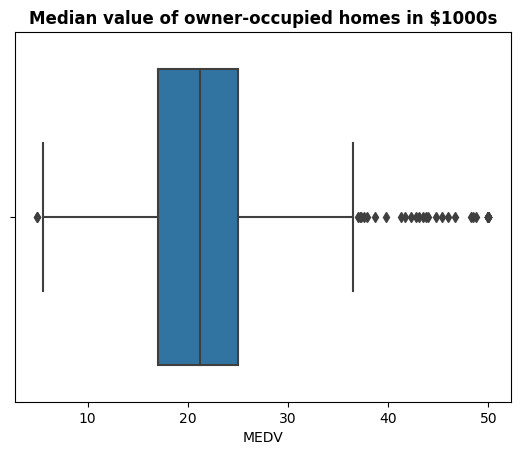

In [16]:
#Task4.1 -->
%matplotlib inline
p = sns.boxplot(x = boston_df['MEDV'])
p.set_xlabel('MEDV')
p.set_title('Median value of owner-occupied homes in $1000s', fontsize= 12, fontweight='bold');

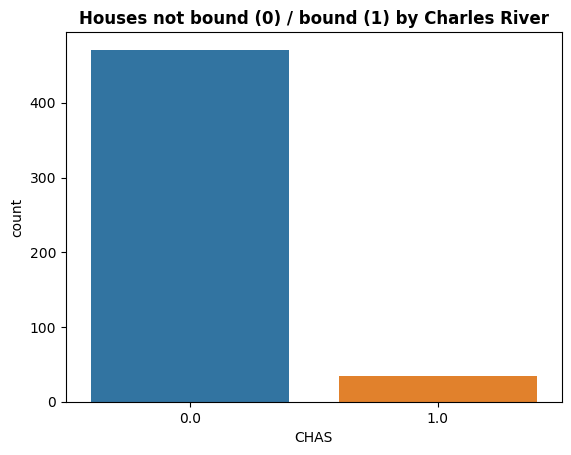

In [40]:
#Task4.2 -->
p = sns.countplot(x = boston_df['CHAS'])
p.set_xlabel('CHAS')
p.set_title('Houses not bound (0) / bound (1) by Charles River', fontsize= 12, fontweight='bold');

In [44]:
#Task4.3 -->
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

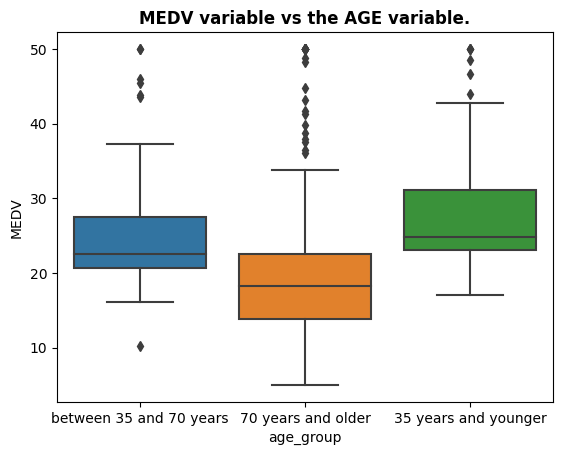

In [45]:
p = sns.boxplot(x = boston_df['age_group'], y = boston_df['MEDV'])
p.set_xlabel('age_group')
p.set_ylabel('MEDV')
p.set_title('MEDV variable vs the AGE variable.', fontsize= 12, fontweight='bold');

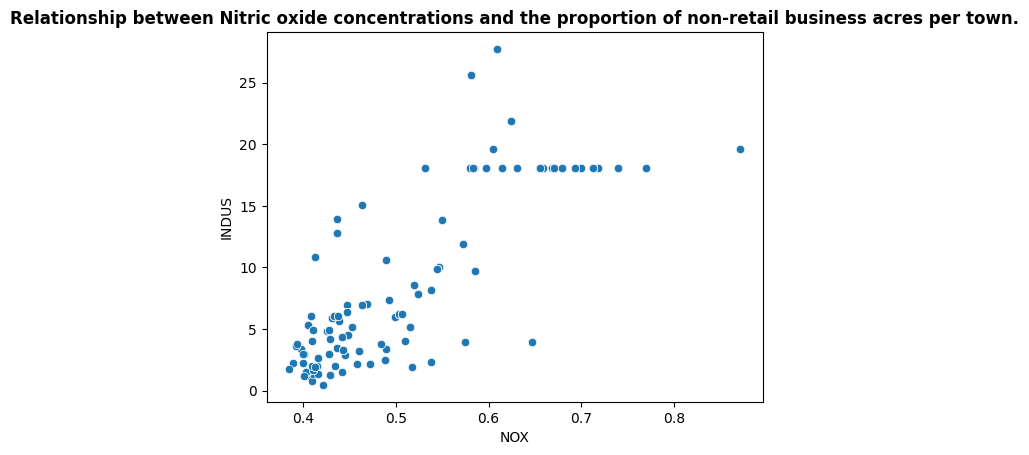

In [46]:
#Task4.4 -->
p = sns.scatterplot(x = boston_df['NOX'], y = boston_df['INDUS'])
p.set_xlabel('NOX')
p.set_ylabel('INDUS')
p.set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.', fontsize= 12, fontweight='bold');

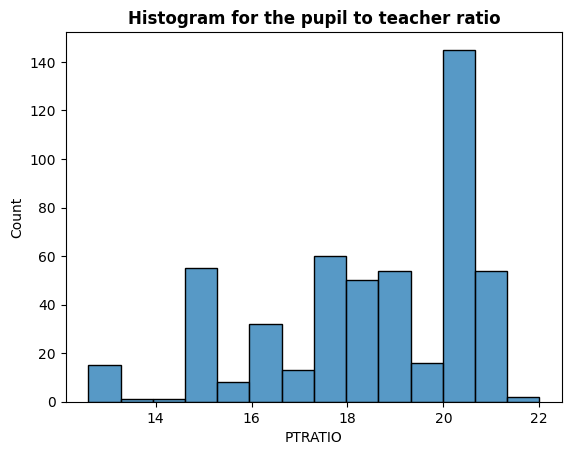

In [47]:
#Task4.5 -->
p = sns.histplot(x = boston_df['PTRATIO'])
p.set_xlabel('PTRATIO')
p.set_title('Histogram for the pupil to teacher ratio', fontsize= 12, fontweight='bold');

In [52]:
#Task 5.1 -->
#Null Hypothesis: There is no difference in median value of houses bounded by the Charles river
#Alternate Hypothesis: There is a significant difference in the median value of houses bounded by the Charles river
# Aplha = 0.05

#At first, let's check for the euality of variance through levene test
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center = 'mean')
# since the p-value is less than 0.05 we can assume inequality of variance


LeveneResult(statistic=8.75190489604598, pvalue=0.0032381193676398285)

In [53]:
#Now, let's run the t-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] ==  1.0]['MEDV'], equal_var = False)


Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

In [54]:
#Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river

In [56]:
#Task 5.2 -->
#Null Hypothesis: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
#Alternate Hypothesis: There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
# Aplha = 0.05

#At first, let's check for the euality of variance through levene test
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is greater than 0.05 we can assume equality of variance


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [57]:
thrityfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

#Now, let's run the one-way ANOVA test
f_statistic, p_value = scipy.stats.f_oneway(thrityfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [58]:
#Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses for each proportion of owner occupied units built prior to 1940 (AGE)

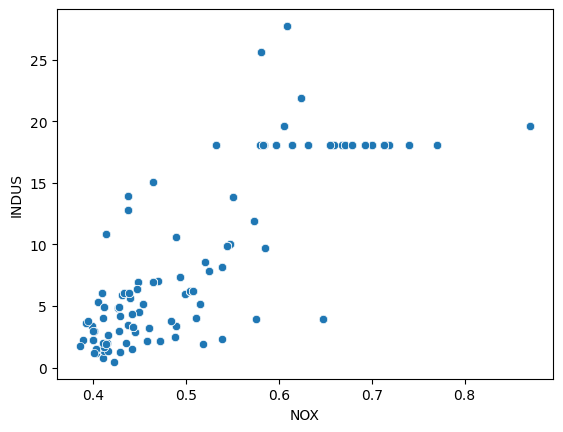

In [61]:
#Task 5.3 -->
#Null Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#Alternate Hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
# Aplha = 0.05

#At first, let's plot the scatter plot between the two varaibles
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)


In [62]:
#Now, let's run the Pearson Correlation test
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

In [63]:
#Conclusion: Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [65]:
#Task 5.3 -->
#Null Hypothesis: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
#Alternate Hypothesis: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
# Aplha = 0.05

#Let's run the regression analysis between two continuous variables
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        22:08:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Conclusion: p < 0.05, we reject the Null hypothesis and conclude that there is evidence of correlation between additional weighted distance to the five Boston employment centres on the median value of owner occupied homes